*Importing* necessary *libraries*

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA


# Dataset 1

Initializing datasets filepaths

In [ ]:
file_paths = {
    '1_ef_b': 'drive/My Drive/Datasets/1_ef_b.csv',
    '1_nrml_b': 'drive/My Drive/Datasets/1_nrml_b.csv',
    '1_ef_ub': 'drive/My Drive/Datasets/1_ef_ub.csv',
    '1_nrml_ub': 'drive/My Drive/Datasets/1_nrml_ub.csv'
}

Loading the datasets into pandas dataframes,

Dropping the results column (whether the patient has lung cancer or not)

Feature scaling the dataframes

In [ ]:
data_frames = {
    '1_ef_b': None,
    '1_nrml_b': None,
    '1_ef_ub': None,
    '1_nrml_ub': None,
}

for key, value in file_paths.items():
  df = pd.read_csv(value)

  true_labels = df['LUNG_CANCER']
  df_numerical = df.drop(['LUNG_CANCER'], axis=1, errors='ignore')

  scaler = StandardScaler()
  df_scaled = scaler.fit_transform(df_numerical)
  data_frames[key] = df_scaled


K-Means Clustering

In [ ]:
inertia_values = {
    '1_ef_b': [],
    '1_nrml_b': [],
    '1_ef_ub': [],
    '1_nrml_ub': [],
}

sil_scores = {
    '1_ef_b': [],
    '1_nrml_b': [],
    '1_ef_ub': [],
    '1_nrml_ub': [],
}

cluster_centroids = {
    '1_ef_b': [],
    '1_nrml_b': [],
    '1_ef_ub': [],
    '1_nrml_ub': [],
}

cluster_labels = {
    '1_ef_b': [],
    '1_nrml_b': [],
    '1_ef_ub': [],
    '1_nrml_ub': [],
}

K_range = range(2, 10)

for key, value in data_frames.items():
  for k in K_range:
      kmeans = KMeans(n_clusters=k, random_state=42)
      kmeans.fit(value)


      labels = kmeans.labels_
      cluster_labels[key].append(labels)

      centroids = kmeans.cluster_centers_
      cluster_centroids[key].append(centroids)

      inertia_values[key].append(kmeans.inertia_)

      sil_score = silhouette_score(value,labels)
      sil_scores[key].append(sil_score)

Plotting the Inertia values to visualize the elbow



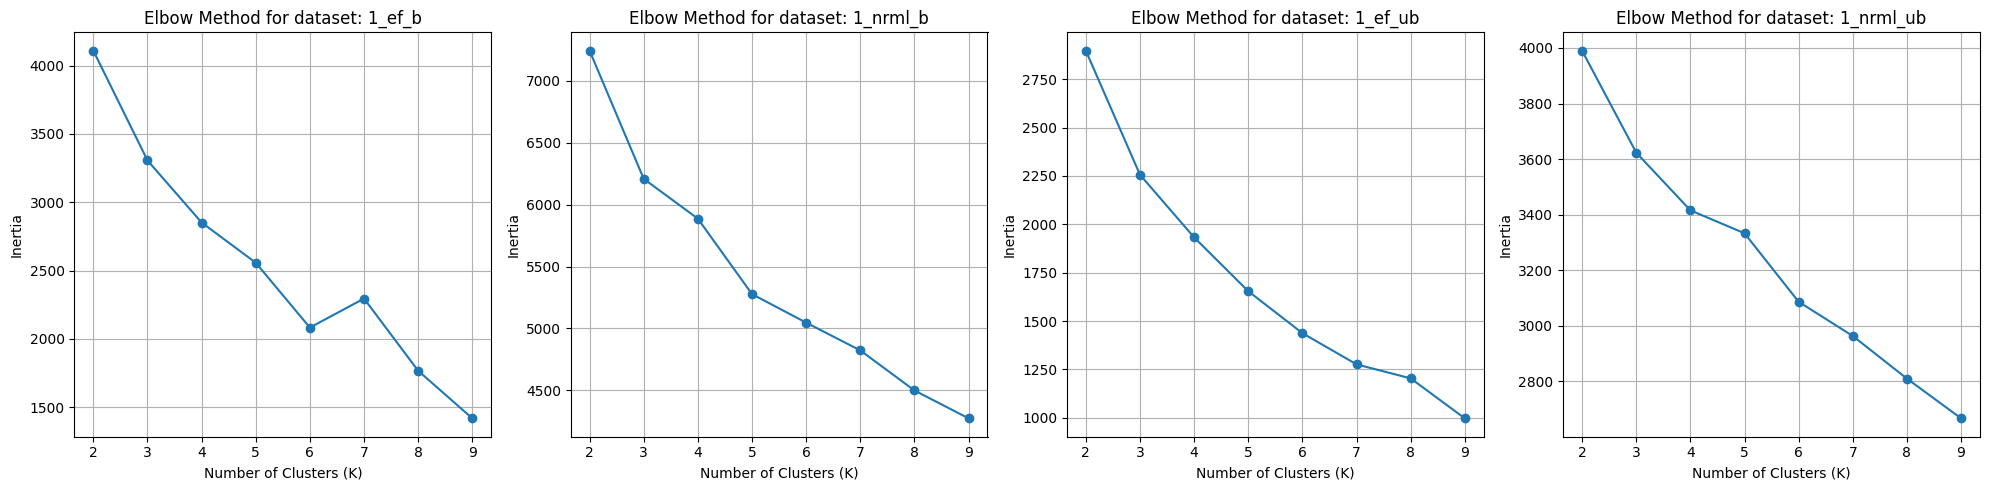

In [ ]:
num_datasets = len(data_frames)
fig, axes = plt.subplots(1, num_datasets, figsize=(5 * num_datasets, 5))

for idx, (key, value) in enumerate(data_frames.items()):
    ax = axes[idx] if num_datasets > 1 else axes
    ax.plot(K_range, inertia_values[key], marker='o')
    ax.set_xlabel("Number of Clusters (K)")
    ax.set_ylabel("Inertia")
    ax.set_title(f"Elbow Method for dataset: {key}")
    ax.grid(True)

plt.tight_layout()
plt.show()

Plotting the silhoutte scores

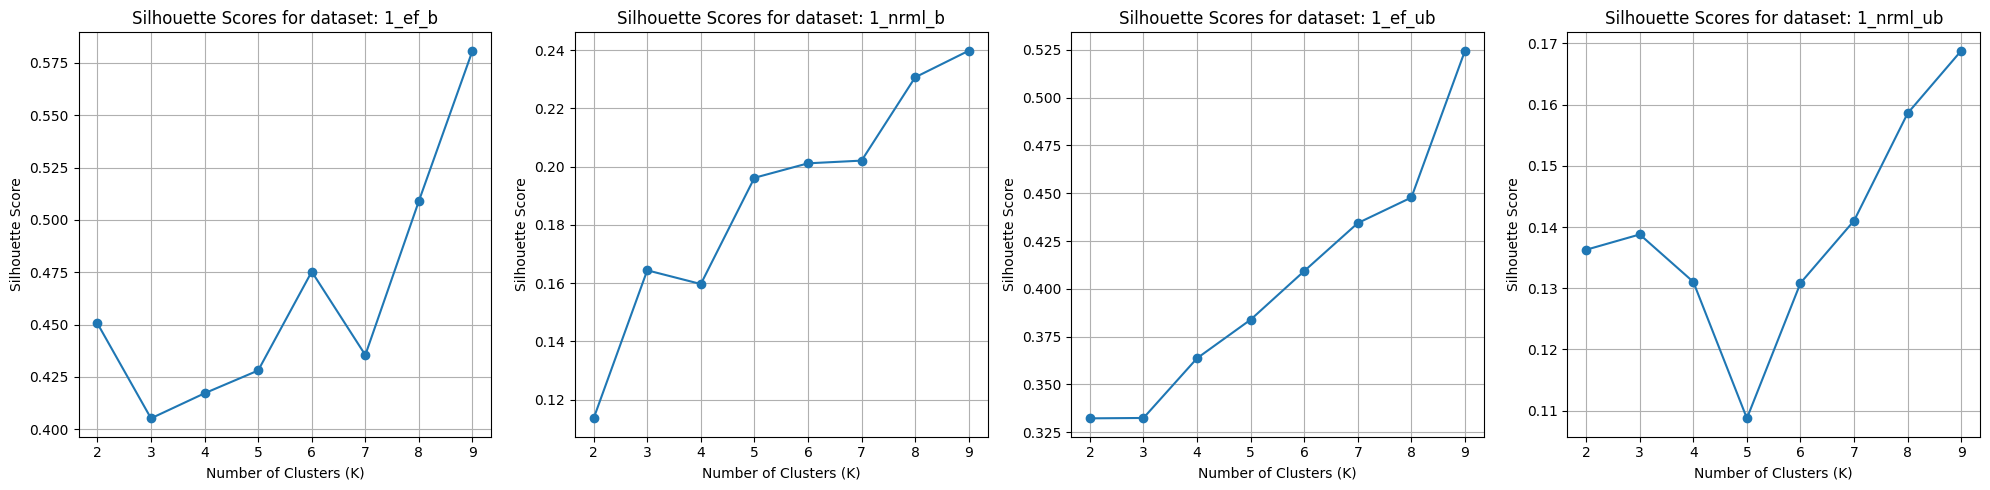

In [ ]:
num_datasets = len(data_frames)
fig, axes = plt.subplots(1, num_datasets, figsize=(5 * num_datasets, 5))

for idx, (key, value) in enumerate(data_frames.items()):
    ax = axes[idx] if num_datasets > 1 else axes
    ax.plot(K_range, sil_scores[key], marker='o')
    ax.set_xlabel('Number of Clusters (K)')
    ax.set_ylabel('Silhouette Score')
    ax.set_title(f'Silhouette Scores for dataset: {key}')
    ax.grid(True)

plt.tight_layout()
plt.show()

Determining the optimal K according to both elbow method and silhouette score

In [ ]:
optimal_K_inertia = {
    '1_ef_b': None,
    '1_nrml_b': None,
    '1_ef_ub': None,
    '1_nrml_ub': None,
}

optimal_K_silhouette = {
    '1_ef_b': None,
    '1_nrml_b': None,
    '1_ef_ub': None,
    '1_nrml_ub': None,
}


for key, value in data_frames.items():

  inertia_diffs = np.diff(inertia_values[key])
  inertia_diff_ratios = inertia_diffs[1:] / inertia_diffs[:-1]
  optimal_K_inertia[key] = K_range[np.argmin(inertia_diff_ratios) + 2]

  optimal_K_silhouette[key] = K_range[np.argmax(sil_scores[key])]

  print("Dataset : ", key)
  print("Optimal number of clusters according to the Elbow Method (Inertia):", optimal_K_inertia[key])
  print("Optimal number of clusters according to the Silhouette Score:", optimal_K_silhouette[key], "\n")


Dataset :  1_ef_b
Optimal number of clusters according to the Elbow Method (Inertia): 8
Optimal number of clusters according to the Silhouette Score: 9 

Dataset :  1_nrml_b
Optimal number of clusters according to the Elbow Method (Inertia): 4
Optimal number of clusters according to the Silhouette Score: 9 

Dataset :  1_ef_ub
Optimal number of clusters according to the Elbow Method (Inertia): 8
Optimal number of clusters according to the Silhouette Score: 9 

Dataset :  1_nrml_ub
Optimal number of clusters according to the Elbow Method (Inertia): 5
Optimal number of clusters according to the Silhouette Score: 9 



Plotting the interia values and silhouette score with the optimal K value

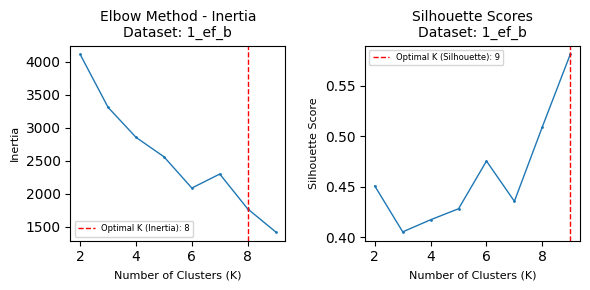

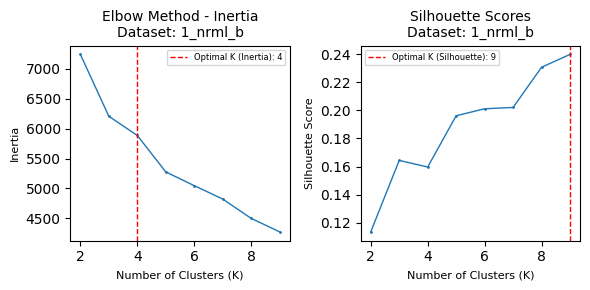

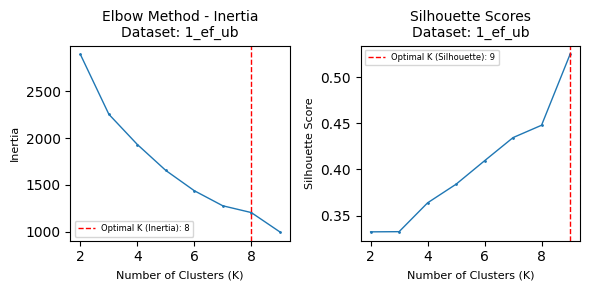

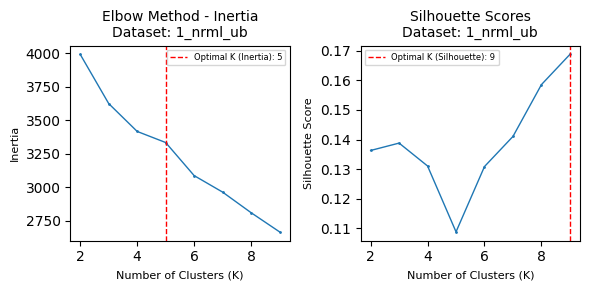

In [ ]:
for key, value in data_frames.items():

    plt.figure(figsize=(6, 3))

    plt.subplot(1, 2, 1)
    plt.plot(K_range, inertia_values[key], marker='o', markersize=1, linewidth=1)
    plt.axvline(optimal_K_inertia[key], color='r', linestyle='--', linewidth=1, label=f'Optimal K (Inertia): {optimal_K_inertia[key]}')
    plt.xlabel('Number of Clusters (K)', fontsize=8)
    plt.ylabel('Inertia', fontsize=8)
    plt.title(f'Elbow Method - Inertia\nDataset: {key}', fontsize=10)
    plt.legend(fontsize=6)

    plt.subplot(1, 2, 2)
    plt.plot(K_range, sil_scores[key], marker='o', markersize=1, linewidth=1)  # Reduce marker size and line width
    plt.axvline(optimal_K_silhouette[key], color='r', linestyle='--', linewidth=1, label=f'Optimal K (Silhouette): {optimal_K_silhouette[key]}')
    plt.xlabel('Number of Clusters (K)', fontsize=8)
    plt.ylabel('Silhouette Score', fontsize=8)
    plt.title(f'Silhouette Scores\nDataset: {key}', fontsize=10)
    plt.legend(fontsize=6)

    plt.tight_layout()
    plt.show()


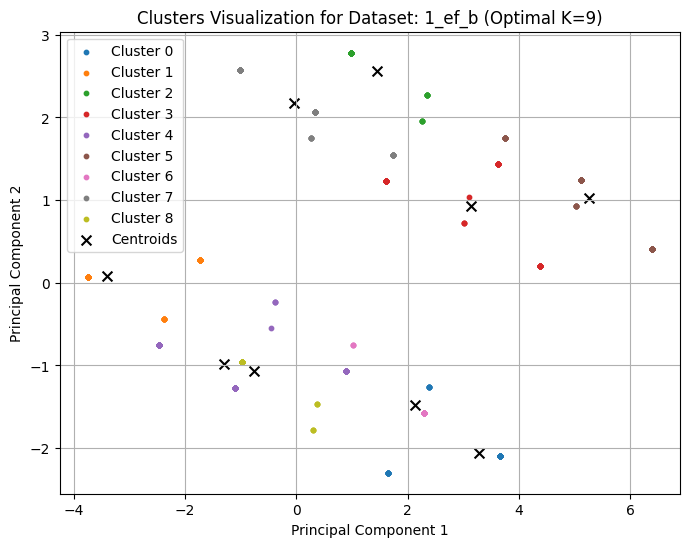

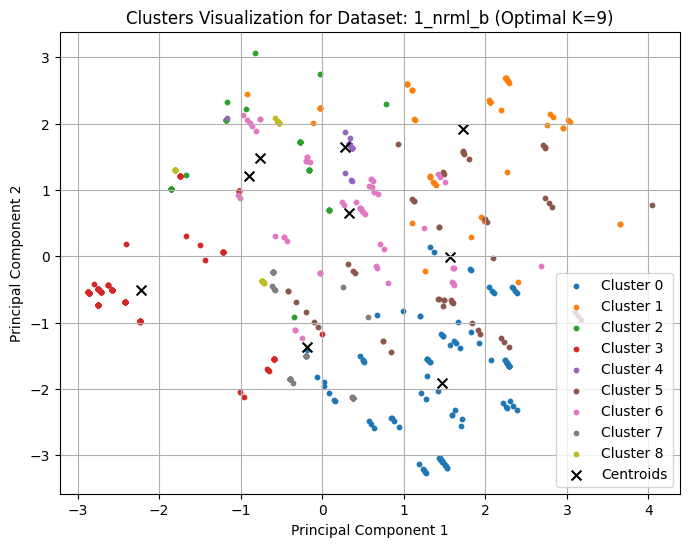

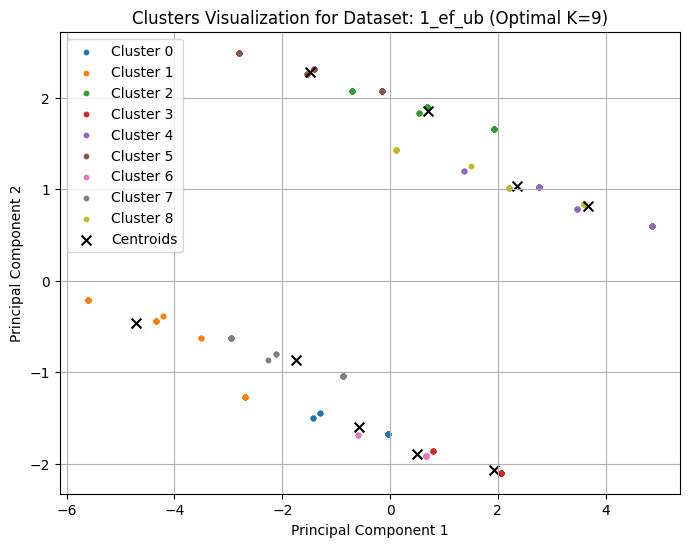

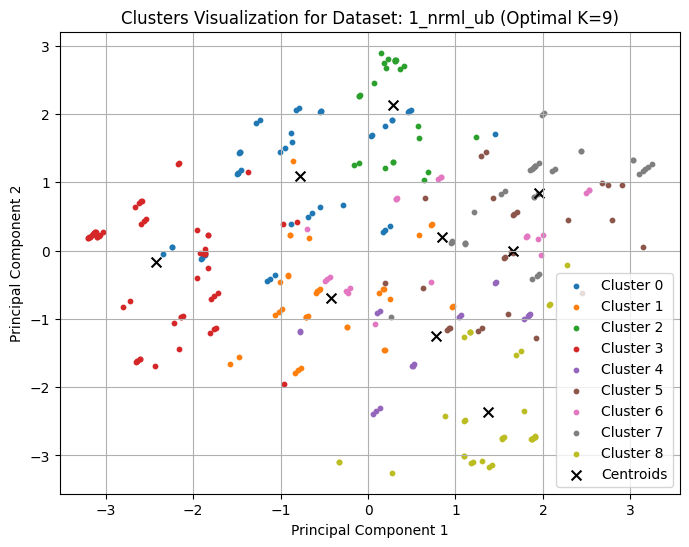

In [ ]:
for key, data in data_frames.items():
    optimal_k = sil_scores[key].index(max(sil_scores[key])) + 2


    kmeans = KMeans(n_clusters=optimal_k, random_state=42)
    labels = kmeans.fit_predict(data)

    pca = PCA(n_components=2)
    reduced_data = pca.fit_transform(data)

    plt.figure(figsize=(8, 6))
    for cluster_id in np.unique(labels):
        cluster_points = reduced_data[labels == cluster_id]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster_id}', s=10)

    reduced_centroids = pca.transform(kmeans.cluster_centers_)
    plt.scatter(reduced_centroids[:, 0], reduced_centroids[:, 1], c='black', marker='x', s=50, label='Centroids')

    plt.title(f'Clusters Visualization for Dataset: {key} (Optimal K={optimal_k})')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.grid(True)
    plt.show()

**Evaluation**



# Dataset 2 (Categorical)

In [13]:
file_paths = {
    '2_nrml': 'drive/My Drive/Datasets/dataset2/2_nrml.csv',
}

Loading the datasets into pandas dataframes,

Dropping the results column (whether the patient has lung cancer or not)

Feature scaling the dataframes

In [14]:
data_frames = {
    '2_nrml': None,
}

for key, value in file_paths.items():
    # Load the dataset into a pandas DataFrame
    df = pd.read_csv(value)

    true_labels = df['Level']  # Target column
    df_numerical = df.drop(['Level'], axis=1, errors='ignore')

    # Feature Scaling
    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(df_numerical)
    data_frames[key] = df_scaled

Evaluating K-means Clustering: Inertia and Silhouette Scores

In [15]:
inertia_values = {
    '2_nrml': [],
}

sil_scores = {
    '2_nrml': [],
}

cluster_centroids = {
    '2_nrml': [],
}

cluster_labels = {
    '2_nrml': [],
}

K_range = range(2, 10)  # Test K values from 2 to 9

for key, value in data_frames.items():
    for k in K_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(value)

        # Get the cluster labels (the assigned cluster for each data point)
        labels = kmeans.labels_
        cluster_labels[key].append(labels)

        # Get the cluster centroids
        centroids = kmeans.cluster_centers_
        cluster_centroids[key].append(centroids)

        # Get the inertia (sum of squared distances of samples to their closest cluster center)
        inertia_values[key].append(kmeans.inertia_)

        # Calculate the silhouette score
        sil_score = silhouette_score(value, labels)
        sil_scores[key].append(sil_score)

Plotting Inertia (Elbow Method)

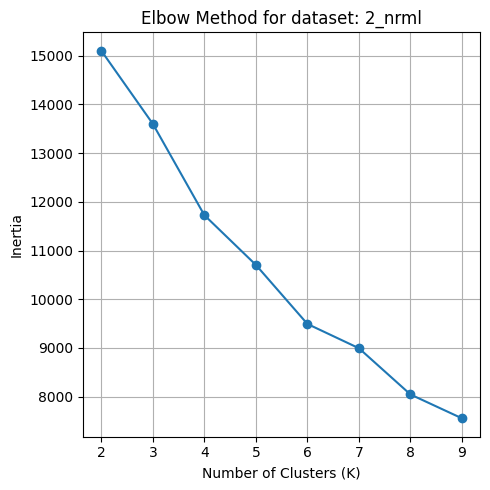

In [16]:
num_datasets = len(data_frames)
fig, axes = plt.subplots(1, num_datasets, figsize=(5 * num_datasets, 5))  # Create side-by-side subplots

# Iterate over datasets and plot inertia values
for idx, (key, value) in enumerate(data_frames.items()):
    ax = axes[idx] if num_datasets > 1 else axes  # Handle single plot case
    ax.plot(K_range, inertia_values[key], marker='o')
    ax.set_xlabel("Number of Clusters (K)")
    ax.set_ylabel("Inertia")
    ax.set_title(f"Elbow Method for dataset: {key}")
    ax.grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

Plotting Silhouette Scores

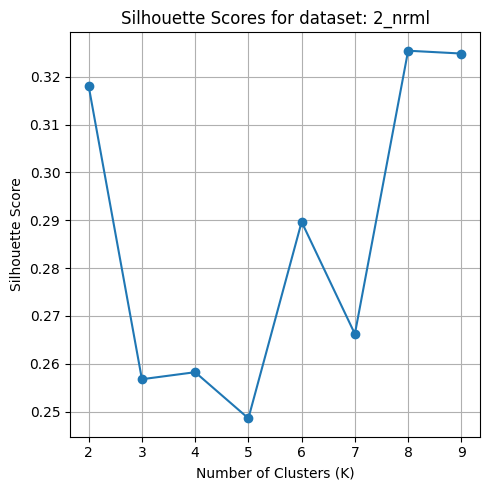

In [17]:
num_datasets = len(data_frames)
fig, axes = plt.subplots(1, num_datasets, figsize=(5 * num_datasets, 5))  # Create side-by-side subplots

# Iterate over datasets and plot
for idx, (key, value) in enumerate(data_frames.items()):
    ax = axes[idx] if num_datasets > 1 else axes  # Handle single plot case
    ax.plot(K_range, sil_scores[key], marker='o')
    ax.set_xlabel('Number of Clusters (K)')
    ax.set_ylabel('Silhouette Score')
    ax.set_title(f'Silhouette Scores for dataset: {key}')
    ax.grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

Finding the Optimal K (Elbow and Silhouette Method)

In [18]:
optimal_K_inertia = {
    '2_nrml': None,
}

optimal_K_silhouette = {
    '2_nrml': None,
}

for key, value in data_frames.items():

    # Determine optimal K according to inertia (Elbow Method)
    inertia_diffs = np.diff(inertia_values[key])  # Calculate differences in inertia values
    inertia_diff_ratios = inertia_diffs[1:] / inertia_diffs[:-1]  # Ratios of successive differences
    optimal_K_inertia[key] = K_range[np.argmin(inertia_diff_ratios) + 2]  # +2 to correct index to K value

    # Determine optimal K according to silhouette score
    optimal_K_silhouette[key] = K_range[np.argmax(sil_scores[key])]

    # Print the optimal K values
    print("Dataset : ", key)
    print("Optimal number of clusters according to the Elbow Method (Inertia):", optimal_K_inertia[key])
    print("Optimal number of clusters according to the Silhouette Score:", optimal_K_silhouette[key], "\n")

Dataset :  2_nrml
Optimal number of clusters according to the Elbow Method (Inertia): 7
Optimal number of clusters according to the Silhouette Score: 8 



Plotting Optimal K for Inertia and Silhouette

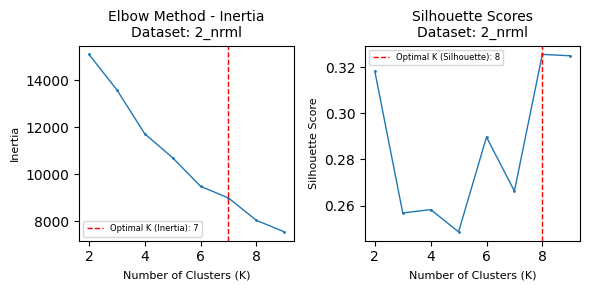

In [19]:
for key, value in data_frames.items():
    # Plotting the inertia values (Elbow method) and silhouette scores
    plt.figure(figsize=(6, 3))  # Smaller figure size

    # Elbow Method Plot (Inertia)
    plt.subplot(1, 2, 1)
    plt.plot(K_range, inertia_values[key], marker='o', markersize=1, linewidth=1)  # Reduce marker size and line width
    plt.axvline(optimal_K_inertia[key], color='r', linestyle='--', linewidth=1, label=f'Optimal K (Inertia): {optimal_K_inertia[key]}')
    plt.xlabel('Number of Clusters (K)', fontsize=8)  # Smaller font size
    plt.ylabel('Inertia', fontsize=8)
    plt.title(f'Elbow Method - Inertia\nDataset: {key}', fontsize=10)
    plt.legend(fontsize=6)  # Smaller legend size

    # Silhouette Score Plot
    plt.subplot(1, 2, 2)
    plt.plot(K_range, sil_scores[key], marker='o', markersize=1, linewidth=1)  # Reduce marker size and line width
    plt.axvline(optimal_K_silhouette[key], color='r', linestyle='--', linewidth=1, label=f'Optimal K (Silhouette): {optimal_K_silhouette[key]}')
    plt.xlabel('Number of Clusters (K)', fontsize=8)
    plt.ylabel('Silhouette Score', fontsize=8)
    plt.title(f'Silhouette Scores\nDataset: {key}', fontsize=10)
    plt.legend(fontsize=6)

    # Adjust layout and show plot
    plt.tight_layout()
    plt.show()


Visualizing Clusters for the Optimal K Value

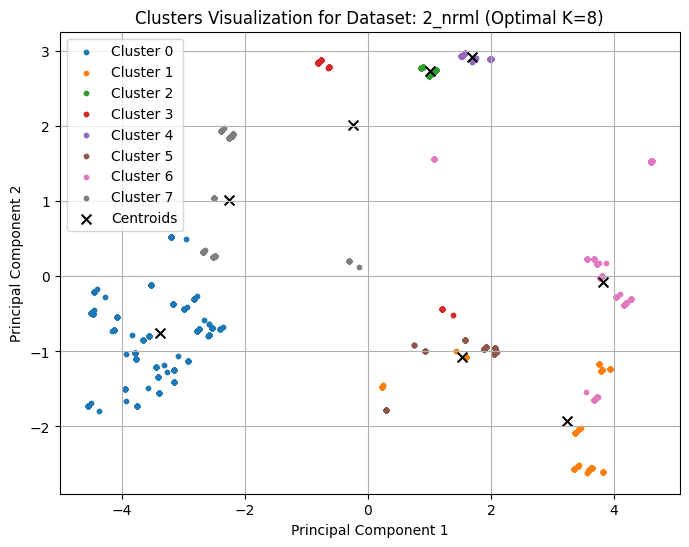

In [20]:
# Visualize clusters for each dataset
for key, data in data_frames.items():
    # Use the optimal number of clusters for this dataset
    optimal_k = sil_scores[key].index(max(sil_scores[key])) + 2  # +2 because K_range starts at 2

    # Fit KMeans again with the optimal K
    kmeans = KMeans(n_clusters=optimal_k, random_state=42)
    labels = kmeans.fit_predict(data)

    # Reduce to 2D using PCA
    pca = PCA(n_components=2)
    reduced_data = pca.fit_transform(data)

    # Scatter plot
    plt.figure(figsize=(8, 6))
    for cluster_id in np.unique(labels):  # Iterate through unique cluster labels
        cluster_points = reduced_data[labels == cluster_id]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster_id}', s=10)  # Adjust marker size

    # Plot centroids
    reduced_centroids = pca.transform(kmeans.cluster_centers_)
    plt.scatter(reduced_centroids[:, 0], reduced_centroids[:, 1], c='black', marker='x', s=50, label='Centroids')  # Centroids

    # Plot settings
    plt.title(f'Clusters Visualization for Dataset: {key} (Optimal K={optimal_k})')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.grid(True)
    plt.show()
